
# Business Objective

Design an AI solution to process the call audio from the call center and enrich the business analytic or operation efficiency with google NLP API

# Mission Goal
As a Prove of Concept process, to make the business operation system smarter by increasing the automation level and operation efficiency with latest Information Technology.

作為概念驗證過程，通過最新的信息技術提高自動化水平和運營效率。

## Task Objective
Verify if possible to make the call center system smarter by making it listen to what the customer is saying and understand what kind of banking service the customer is requesting.

驗證是否有可能使系統透過聆聽客戶電話而明白客戶要求的銀行服務。

natural language processing
automated customer service



# Background and Assumption

<b>What banking service the cutomer is requesting?
Will it be better if no need to key in the digit from the "moutain of keys" to ask for the service?</b>

![hotline guide](hotline_guide.JPG)



User following category names for the machine learning label as an example, let the machine predict what the customers want in terms of following category.

![service category](service_cat.JPG)

As a starting point to trigger system process of further information collection based on the prediction, e.g. provide automatic response with answers without intervention of human customer service representatives, further revision on customer call category based on statistics, provide consolidated and related information for human customer service representatives.

<b>A little understanding on machine learning and Artificial Intelligence</b>


![key of Machine Learning](keyOfML.png)
Machine learning is technically a branch of AI, but it's more specific than the overall concept. Machine learning is based on the idea that we can build machines to process data and learn on their own, without our constant supervision.


<b>Money is the King. Nowadays, DATA is the king. As Data = Money</b>

Depends on if you know how to use it.
![data equals money](data_money.PNG)


<b> Formally, the 7 Steps of Machine Learning </b>

1. Gathering data
2. Preparing that data
3. Choosing a model
4. Training
5. Evaluation
6. Hyperparameter tuning
7. Prediction

![automl intro](automl.PNG)


![automlnlp intro](automlnlp.PNG)

We are going to use minimum resource with highest efficiency to prove if the concept works.
<b>Challenge</b>
1. No real data to train the model, then use simulated one (self-recorded voice)
2. Google AutoML is a new service, keep evolving and changing, also no comprehensive document yet, need to try
3. Limited time, prove if it works first so using simple data and methodology, keep it evolve after Prove of Concept successful


<b>Sample dataset to be used to train the Machine Learning model</b>

![sample data](sampledata.PNG)

# General flow
To convert the speech to texts and analyze the texts using machine learning.

To classify the phone calls into different banking service categories.



1. Make voice recordings to simulate phone calls to the call center.
2. Eliminate or reduce voice recording background noise.
3. Carry out speech to text conversion using Google cloud Speech-to-Text API.
4. Analyze the converted texts using Google AutoML NLP API Content Classification.


# Reduce noise

<b>Why bother?</b>

Garbage in garbage out.
Affecting the speech to text result and ultimately the accuracy of the prediction


<b>A little background</b>

![sound wave anaimation](originofsound.gif)


![sound sampling](soundsampling.jpg)


![noise reduction example](noiserdEg.png)



## Sample 1 (Fan noise)

### The original sound

In [ ]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

from playsound import playsound


playsound('voice-fan-noise-2.wav') 

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('voice-fan-noise-2.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')


plot.show()



In [ ]:
from playsound import playsound
playsound('voice-fan-noise-2.wav')


### Reduce the background noise using Python API

In [ ]:
from logmmse import logmmse_from_file
logmmse_from_file('voice-fan-noise-2.wav', output_file='voice-fan-rd-2.wav', initial_noise=30, window_size=0, noise_threshold=0.15)


### The result

In [ ]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

 

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('voice-fan-rd-2.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')

 

plot.show()

In [ ]:
from playsound import playsound
playsound('voice-fan-rd-2.wav')

## Sample 2 (Wind noise)

### The original sound

In [ ]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile

from playsound import playsound


playsound('voice-wind-noise.wav')


# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('voice-wind-noise.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')


plot.show()

In [ ]:
from playsound import playsound
playsound('voice-wind-noise.wav')

### Reduce the background noise using Python API

In [ ]:
logmmse_from_file('voice-wind-noise.wav', output_file='voice-wind-rd.wav', initial_noise=6, window_size=0, noise_threshold=0.15)


### The result

In [ ]:
#import the pyplot and wavfile modules 

import matplotlib.pyplot as plot

from scipy.io import wavfile
from playsound import playsound

playsound('voice-wind-rd.wav')  

# Read the wav file (mono)

samplingFrequency, signalData = wavfile.read('voice-wind-rd.wav')

 

# Plot the signal read from wav file

plot.subplot(211)

plot.title('Spectrogram of a wav file')

 

plot.plot(signalData)

plot.xlabel('Sample')

plot.ylabel('Amplitude')

 

plot.subplot(212)

plot.specgram(signalData,Fs=samplingFrequency)

plot.xlabel('Time')

plot.ylabel('Frequency')



plot.show()



In [ ]:
from playsound import playsound
playsound('voice-wind-rd.wav') 

## To record sound here (optional)

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write
fs = 16000 # Sample rate
seconds = 5  # Duration of recording

myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1)
sd.wait()  # Wait until recording is finished
write('rec-voice-test1.wav', fs, myrecording)  # Save as WAV file


# Google speech to text

![speech to text](speech2text.png)


## Convert the sound to text

In [ ]:
import io
import os

# Imports the Google Cloud client library
from google.cloud import speech
from google.cloud.speech import enums
from google.cloud.speech import types

# Instantiates a client
client = speech.SpeechClient()


# Loads the audio into memory
with io.open('voice-fan-rd-2.wav', 'rb') as audio_file:
    content = audio_file.read()
    audio = types.RecognitionAudio(content=content)

config = types.RecognitionConfig(
    encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
    sample_rate_hertz=16000,
    language_code='yue-Hant-HK')

# Detects speech in the audio file
response = client.recognize(config, audio)


for result in response.results:
    print('Transcript: {}'.format(result.alternatives[0].transcript))

In [ ]:
fout = open('output.txt', 'w', encoding="utf-16")

for result in response.results:
    fout.write(' {}'.format(result.alternatives[0].transcript))
    fout.write('\n')

fout.close()

# Google natural language processing


![nlp head](nlp.PNG)

Some background

![automlnlp data](automlnlpdata.png)

![sample data](sampledata.PNG)


![automlnlp model](automlmodel.png)




In [ ]:
import sys

from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2


def get_prediction(content, project_id, model_id):
  prediction_client = automl_v1beta1.PredictionServiceClient()

  name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
  payload = {'text_snippet': {'content': content, 'mime_type': 'text/plain' }}
  params = {}
  request = prediction_client.predict(name, payload, params)
  return request  # waits till request is returned


content="我想知港元儲蓄戶口嘅利息係幾多"

project_id="nlapi-test-1567058483241"

model_id="TCN581844099215013286" 

print(get_prediction(content, project_id,  model_id))


# Conclusion

It works!

Like to try some live demo?

1. Record the sound
2. Reduce the noise (optional)
3. Convert to text
4. Analyze the text

![nlp demo](nlpdemo.png)

ready to record?y
recording... please speak to the microphone, you have 5 seconds recording time
voice recorded and it's playing back now


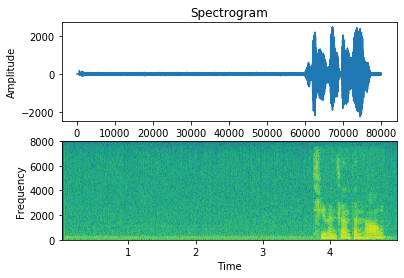



To trigger the background noice reduction process
Please press y and then enter key 
Or any other key to use original voice recording:y

Background noise reduction is under processing...

The voice quality is 3.43 (0=worst, 4.5=best)


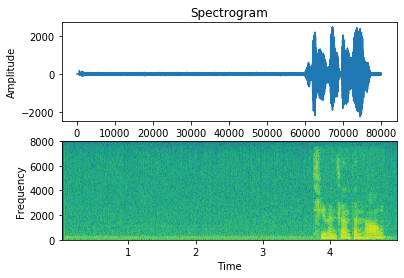

Converting voice in file "input1-rd.wav" to text...
......
You said: 慈雲山分行

Analyzing...
﻿ 慈雲山分行


The system guess the requested banking service is: 

payload {
  classification {
    score: 0.7259175777435303
  }
  display_name: "Other"
}
payload {
  classification {
    score: 0.12059182673692703
  }
  display_name: "Bank_Account_Deposit"
}
payload {
  classification {
    score: 0.05559927225112915
  }
  display_name: "Insurance"
}
payload {
  classification {
    score: 0.03407309949398041
  }
  display_name: "Investment"
}
payload {
  classification {
    score: 0.02865413762629032
  }
  display_name: "credit_card"
}
payload {
  classification {
    score: 0.015857243910431862
  }
  display_name: "MPF"
}
payload {
  classification {
    score: 0.010400207713246346
  }
  display_name: "Report_lost_card"
}
payload {
  classification {
    score: 0.00890660472214222
  }
  display_name: "Personal_Loans_Mortgages"
}



In [2]:
%matplotlib inline

#for playbackvoice()
import sounddevice as sd
from scipy.io.wavfile import write
from playsound import playsound

#for plotvoice() 
import matplotlib.pyplot as plot
from scipy.io import wavfile

#for ratevoice()
from scipy.io import wavfile
from pypesq import pypesq

#for reducenoise()
from logmmse import logmmse_from_file

#for s2t() #speech to text 
import io
import os
from google.cloud import speech
from google.cloud.speech import enums
from google.cloud.speech import types


import sys
from google.cloud import automl_v1beta1
from google.cloud.automl_v1beta1.proto import service_pb2

#================
#Global variables
#================

#the filename of the original voice recording 
voicewave='input1.wav'

#the filename of the voice recording after noise reduction processing to original voice recording 
voicerd='input1-rd.wav'

#the filename of the converted text of the voice recording
voicetext="s2text.txt"

# Duration of recording
seconds = 5  

########################
#record the sound
########################
def recordvoice():
    fs = 16000 # Sample rate

    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=1, dtype='int16')
    sd.wait()  # Wait until recording is finished
    write(voicewave, fs, myrecording)  # Save as WAV file

 

########################
#Plot the sound
########################
def plotvoice():
    samplingFrequency, signalData = wavfile.read(voicewave)
    
    plot.subplot(211)
    
    plot.title('Spectrogram')
    plot.plot(signalData)

    plot.xlabel('Sample')
    plot.ylabel('Amplitude')

    plot.subplot(212)
    plot.specgram(signalData,Fs=samplingFrequency)

    plot.xlabel('Time')
    plot.ylabel('Frequency')

    plot.show();


########################
#play back the sound 
########################
def playbackvoice():
    print("voice recorded and it's playing back now")
    playsound(voicewave)


########################
#rate the sound quality
########################
def reducenoise():
    logmmse_from_file(voicewave, output_file=voicerd, initial_noise=60, window_size=0, noise_threshold=0.15)



########################
#rate the sound quality
########################
def ratevoice():
    rate, ref = wavfile.read(voicewave)
    rate, deg = wavfile.read(voicerd)
    pesqvalnb=pypesq(rate, ref, deg, 'nb')
    print("The voice quality is %.2f (0=worst, 4.5=best)" % pesqvalnb)


########################
#speech to text
########################
def s2t(voicefile):
    # Instantiates a client
    client = speech.SpeechClient()

    print("Converting voice in file \"%s\" to text..." % voicefile)
    print("......")
    # Loads the audio into memory
    with io.open(voicefile, 'rb') as audio_file:
        content = audio_file.read()
        audio = types.RecognitionAudio(content=content)

    config = types.RecognitionConfig(
        encoding=enums.RecognitionConfig.AudioEncoding.LINEAR16,
        sample_rate_hertz=16000,
        language_code='yue-Hant-HK')

    # Detects speech in the audio file
    response = client.recognize(config, audio)
    
    fout = open(voicetext, 'w', encoding="utf-16")

    for result in response.results:
        print('You said: {}'.format(result.alternatives[0].transcript))
        fout.write(' {}'.format(result.alternatives[0].transcript))
        fout.write('\n')
    
    fout.close()



########################
#Automl analyze text
########################
def automlcat():
    def get_prediction(content, project_id, model_id):
        prediction_client = automl_v1beta1.PredictionServiceClient()
        name = 'projects/{}/locations/us-central1/models/{}'.format(project_id, model_id)
        payload = {'text_snippet': {'content': content, 'mime_type': 'text/plain' }}
        params = {}
        request = prediction_client.predict(name, payload, params)
        return request  # waits till request is returned

    fin=open(voicetext,"r", encoding='utf-16-le')

    if fin.mode == 'r':
        content = fin.read()

    print("\nAnalyzing...\n" + content + "\n")

    project_id="nlapi-test-1567058483241"

    model_id="TCN581844099215013286" 

    print("The system guess the requested banking service is: \n")

    print(get_prediction(content, project_id,  model_id))


########################=================================================
#start the action main()
########################=================================================
startprompt=" "
startprompt=str(input("ready to record?"))
    
if startprompt !='y':
    print('Please press y and then enter key to proceed.')
    sys.exit("Exiting...")
else:
    print("recording... please speak to the microphone, you have %d seconds recording time" % seconds)
    recordvoice()
        
playbackvoice()
plotvoice()

rdprompt=" "
print("\n")
print("To trigger the background noice reduction process")
print("Please press y and then enter key ")
rdprompt=str(input("Or any other key to use original voice recording:"))
    
if rdprompt =='y':
    print("\nBackground noise reduction is under processing...\n")
    reducenoise()
    ratevoice()
    plotvoice()
    s2t(voicerd)
else:
    print("Keep going without noise reduction processing...")
    s2t(voicewave)

automlcat()


